<h1 align="center">EXPLORATORY DATA ANALYSIS</h1>

<p align="center">Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.</p>

---

## Loading the Data and Libraries
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("penguins.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


---
## Dataset Information
---

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

So now in order to make this dataset balanced we need to perform some operations.

Let's replace the missing values with mean or mode.
Replace null values in the sex column with MALE.

In [5]:
data["culmen_length_mm"] = data["culmen_length_mm"].fillna(value = data["culmen_length_mm"].mean())
data["culmen_depth_mm"] = data["culmen_depth_mm"].fillna(value = data["culmen_depth_mm"].mean())
data["flipper_length_mm"] = data["flipper_length_mm"].fillna(value = data["flipper_length_mm"].mean())
data["body_mass_g"] = data["body_mass_g"].fillna(value = data["body_mass_g"].mean())

data['sex'] = data['sex'].fillna('MALE')

In [6]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Dataset Description

In [7]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Dataset description of the Adelie Class

In [8]:
penguins_Adelie = data.loc[data["species"]=="Adelie"]
penguins_Adelie.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,152.000000,152.000000,152.000000,152.000000
mean,38.825144,18.338495,190.025758,3703.958910
std,2.686991,1.216483,6.578130,458.848798
min,32.100000,15.500000,172.000000,2850.000000
25%,36.775000,17.475000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.800000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [9]:
# No. of penguins in each species
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

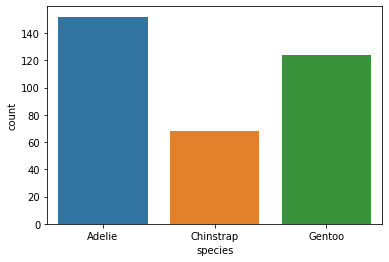

Adelie penguins are the highest in number followed by Gentoo and Chinstrap.


In [10]:
sns.countplot('species',data=data)
plt.show()
print("Adelie penguins are the highest in number followed by Gentoo and Chinstrap.")

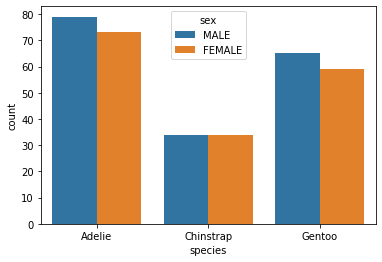

In [11]:
sns.countplot(x="species", hue="sex", data=data)
plt.show()

---

# BIVARIATE ANALYSIS

Bivariate analysis means the analysis of bivariate data. It is one of the simplest forms of statistical analysis, used to find out if there is a relationship between two sets of values.

---

### 2-D Scatter Plot of all the classes in different colors 

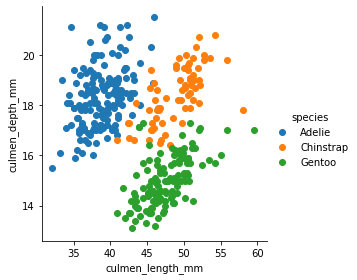

In [12]:
# Plot for culmen length versus culmen depth
sns.FacetGrid(data,hue='species', height=4).map(plt.scatter,'culmen_length_mm','culmen_depth_mm').add_legend()

---
## Pair Plot

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

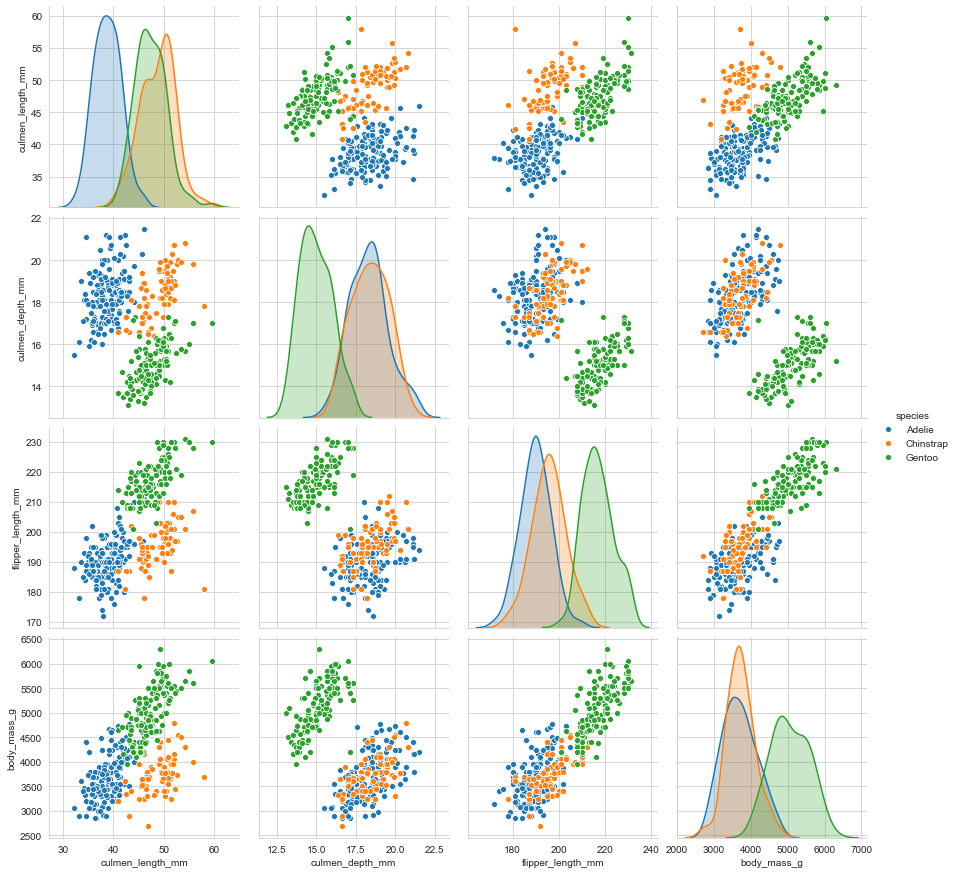

In [13]:
sns.set_style('whitegrid')
sns.pairplot(data,hue='species', height=3)

Looking at the pairplot we can conclude that on the basis of

1. Culmen length - Adelie is easily seperable.
2. Culmen depth, flipper length and body mass - Gentoo is easily seperable.

---

# UNIVARIATE ANALYSIS

Univariate analysis is the simplest form of statistical analysis. The only keypoint is that in this type of analysis only one variable is involved.

---

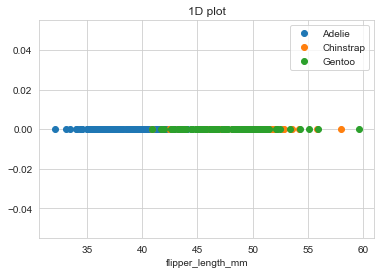

In [14]:
adelie = data.loc[data["species"] == "Adelie"]
chinstrap = data.loc[data["species"] == "Chinstrap"]
gentoo = data.loc[data["species"] == "Gentoo"]

plt.plot(adelie["culmen_length_mm"], np.zeros_like(adelie['body_mass_g']), 'o')
plt.plot(chinstrap["culmen_length_mm"], np.zeros_like(chinstrap['body_mass_g']), 'o')
plt.plot(gentoo["culmen_length_mm"], np.zeros_like(gentoo['body_mass_g']), 'o')
plt.legend(['Adelie', 'Chinstrap', 'Gentoo'])
plt.xlabel('flipper_length_mm')
plt.title('1D plot')

plt.show()

No conclusions can be made from the above figure as there are overlapping between each of the categories.

---
## Histogram

A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

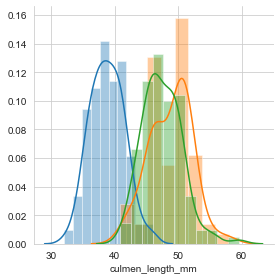

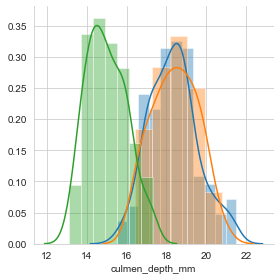

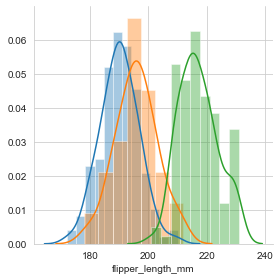

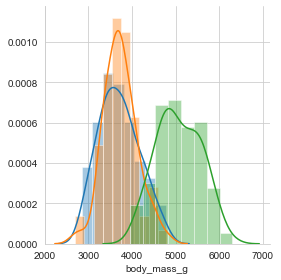

In [15]:
sns.FacetGrid(data=data, hue="species", height=4).map(sns.distplot, "culmen_length_mm")
sns.FacetGrid(data=data, hue="species", height=4).map(sns.distplot, "culmen_depth_mm")
sns.FacetGrid(data=data, hue="species", height=4).map(sns.distplot, "flipper_length_mm")
sns.FacetGrid(data=data, hue="species", height=4).map(sns.distplot, "body_mass_g")

Once plotting the histogram for each feature it's clear that on the basis of 

1. Culmen length, Adelie is seperable while the other two overlap.
2. Culmen depth, Flipper length and body mass Gentoo is seperable while the other two overlap.

---
## Box Plot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

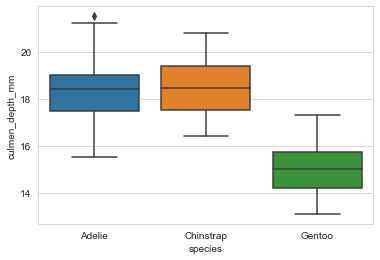

In [16]:
sns.boxplot(x='species',y='culmen_depth_mm', data=data)
plt.show()

---
## Violin Plot

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side.

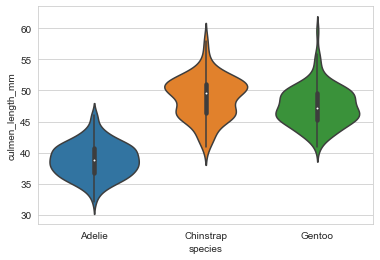

In [17]:
sns.violinplot(x="species", y="culmen_length_mm", data=data, size=8)
plt.show()

---

# MULTI-VARIATE ANALYSIS

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

---

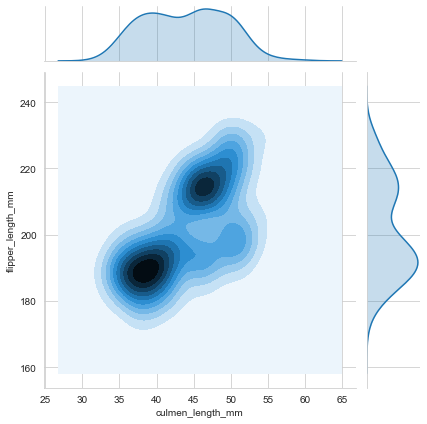

In [18]:
sns.jointplot(x="culmen_length_mm", y="flipper_length_mm",data = data, kind="kde")
plt.show()

 In this 2d plot Dark layer indicates more points and light layers or hills is called less points.
 These light to dark lines is called contours. This graph is called Contours probability density plot.